In [2]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
sys.path.append('../src')
from fantasy_stats_from_pbp import *
from retreive_adp_data import *

In [3]:
# read in df from nfl fast R data collected
pbp = pd.read_pickle('../data/raw/nfl_pbp_data.pkl')
pbp.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,year,yrdln
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,0.0,6.0,0,1999,ARI 30
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,0.0,6.0,10,1999,PHI 23
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,1.0,6.0,10,1999,PHI 23
3,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76.0,NaN,0.0,6.0,9,1999,PHI 24
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.0,NaN,10.0,6.0,14,1999,PHI 19


In [4]:
josh_allen_id = '00-0034857'
josh_allen_stats = create_player_stats(josh_allen_id, pbp)
josh_allen_stats['fantasy_pts'] = josh_allen_stats.apply(lambda row: calculate_espn_ppr_score(row), axis=1)
josh_allen_stats

c:\Users\irela\Documents\NSS_Projects\ff-draft-optimizer\notebooks\../src\fantasy_stats_from_pbp.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pbp['two_pt'] = np.where((pbp['two_point_conv_result']=='success'), 1, 0)


,id,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,receive_touchdown,fantasy_pts
season,,,,,,,,,,,,
2018,00-0034857,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,0.0,206.86
2019,00-0034857,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,0.0,288.56
2020,00-0034857,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,1.0,396.06
2021,00-0034857,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,0.0,378.72
2022,00-0034857,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,0.0,373.76
2023,00-0034857,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,0.0,369.58
2024,00-0034857,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,0.0,372.34


In [5]:
#all_players = calculate_all_players_season_stats(save_to_csv=True, csv_filepath='../data/processed/season_stats_05_17.csv')
all_players = pd.read_csv('../data/processed/season_stats_05_17.csv')
rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)
all_players = pd.merge(all_players, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
all_players.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_3992\3239920645.py:3: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)


,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,18.0,WC,A01,Doug,NaN
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,19.0,DIV,A01,Doug,NaN


In [6]:
unnecessary_cols = ['espn_id', 'sportradar_id', 'yahoo_id',
       'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id', 'sleeper_id',
       'esb_id', 'gsis_it_id', 'smart_id', 'entry_year', 'draft_club', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name',
       'draft_number']
all_players = all_players[[col for col in all_players.columns if col not in unnecessary_cols]]
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,first_name,last_name,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0


In [7]:
fantasy_positions = ['QB', 'RB', 'TE', 'WR'] # Not taking kickers or defense into account
all_players = all_players[all_players['position'].isin(fantasy_positions)]

In [8]:
#josh_allen_id = '00-0034857'
#jamar_chase_id = '00-0036900'

## EDA

How are fantasy points distributed by position? (e.g., RBs vs. WRs)

In [9]:
all_players.groupby('position')['fantasy_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,2012.0,99.673300,105.649874,-7.28,7.69,56.26,182.405,417.08
RB,3690.0,81.493409,86.483618,-8.00,12.20,50.30,128.050,481.10
TE,916.0,79.987031,68.740352,-2.00,20.90,61.95,123.800,330.90
WR,4323.0,93.190062,85.058646,-6.00,18.60,70.40,149.600,412.90


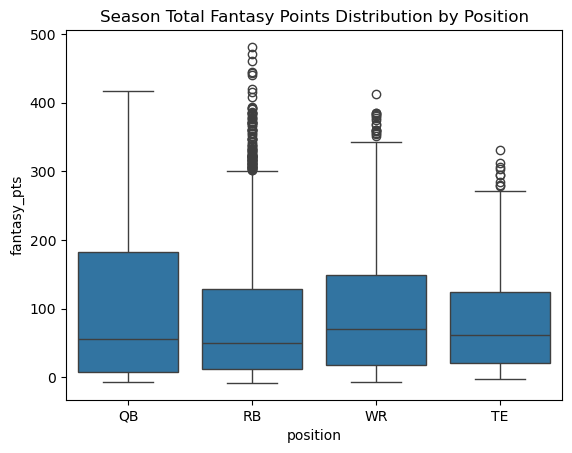

In [10]:
sns.boxplot(data=all_players, x='position', y='fantasy_pts')
plt.title('Season Total Fantasy Points Distribution by Position')
plt.show()

Which positions have the most year-to-year consistency in performance?

In [11]:
all_players['ff_pts_prev_year'] = all_players.groupby('id')['fantasy_pts'].shift(1)
all_players['ff_pts_diff'] = all_players['fantasy_pts'] - all_players['ff_pts_prev_year']
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,52.34,-11.66
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,40.68,-40.78
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,-0.10,9.36
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,9.26,-9.32


In [12]:
all_players.groupby('position')['ff_pts_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,1612.0,-4.286179,82.299962,-387.0,-46.925,-2.07,32.735,406.72
RB,2725.0,-7.045930,73.558615,-394.8,-45.100,-2.10,24.200,332.80
TE,781.0,-0.681485,53.301115,-182.0,-29.900,0.00,26.200,205.40
WR,3433.0,-5.446391,67.852323,-307.6,-44.900,-3.00,31.900,325.80


Seems that Tight Ends have the greatest mean in ff pts difference year to year. Tight Ends also have the lowest standard deviation in points year to year.

What is the correlation between a player’s fantasy finish and:
ADP?
Team offensive stats?

In [13]:
#adp_data = adp_data_all_years(2024, split=True, save_to_csv=True, csv_filepath='../data/raw/adp_data.csv')
adp_data = pd.read_csv('../data/raw/adp_data.csv')
adp_data.head()

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG,season,position,position_rank,full_name,team,bye_week
0,1,Le'Veon Bell,RB1,NaN,NaN,NaN,1.0,NaN,1.5,2015,RB,1.0,Le'Veon Bell,NaN,NaN
1,2,Adrian Peterson,RB2,NaN,NaN,NaN,2.0,NaN,1.8,2015,RB,2.0,Adrian Peterson,NaN,NaN
2,3,Antonio Brown,WR1,NaN,NaN,NaN,4.0,NaN,3.8,2015,WR,1.0,Antonio Brown,NaN,NaN
3,4,Jamaal Charles,RB3,NaN,NaN,NaN,5.0,NaN,4.0,2015,RB,3.0,Jamaal Charles,NaN,NaN
4,5,Eddie Lacy,RB4,NaN,NaN,NaN,3.0,NaN,4.0,2015,RB,4.0,Eddie Lacy,NaN,NaN


In [161]:
#adp_season_df = merge_adp_all_players(adp_data, all_players)
#adp_season_df.to_csv('../data/processed/adp_season.csv', index=False)
adp_season_df = pd.read_csv('../data/processed/adp_season.csv')
adp_season_df.head()

,id,team_all_players,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,ff_pts_diff,Rank,ESPN,AVG,position_rank,bye_week,position_season_end_rank,season_end_rank,position_season_end_rank_diff,season_end_rank_diff
0,00-0012726,PHI,QB,1999,0,1276.0,7.0,0.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,44,198,NaN,NaN
1,00-0012726,CLE,QB,2000,0,1047.0,2.0,0.0,8.0,0.0,...,-11.66,NaN,NaN,NaN,NaN,NaN,41,204,NaN,NaN
2,00-0012726,GB,QB,2001,0,0.0,0.0,0.0,0.0,0.0,...,-40.78,NaN,NaN,NaN,NaN,NaN,70,341,NaN,NaN
3,00-0012726,GB,QB,2002,0,134.0,1.0,0.0,0.0,0.0,...,9.36,NaN,NaN,NaN,NaN,NaN,54,274,NaN,NaN
4,00-0012726,GB,QB,2003,0,16.0,0.0,0.0,0.0,0.0,...,-9.32,NaN,NaN,NaN,NaN,NaN,75,340,NaN,NaN


In [162]:
adp_season_df = adp_season_df.rename(columns={'team_all_players':'team'})
adp_season_df['team_total_season_fantasy_pts'] = adp_season_df.groupby(['team', 'season'])['fantasy_pts'].transform('sum')

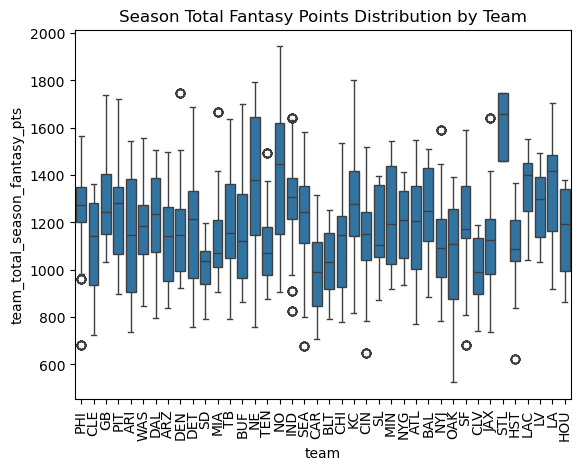

In [163]:
sns.boxplot(data=adp_season_df, x='team', y='team_total_season_fantasy_pts')
plt.title('Season Total Fantasy Points Distribution by Team')
plt.xticks(rotation=90)
plt.show()

In [164]:
corr = adp_season_df[['fantasy_pts', 'AVG', 'team_total_season_fantasy_pts', 'season_end_rank']]
corr.corr()

,fantasy_pts,AVG,team_total_season_fantasy_pts,season_end_rank
fantasy_pts,1.000000,-0.621828,0.141909,-0.934482
AVG,-0.621828,1.000000,-0.097623,0.653696
team_total_season_fantasy_pts,0.141909,-0.097623,1.000000,-0.051080
season_end_rank,-0.934482,0.653696,-0.051080,1.000000


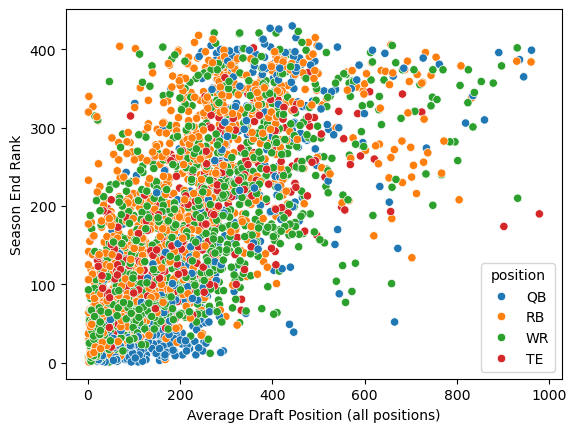

In [165]:
sns.scatterplot(data=adp_season_df, x='AVG', y='season_end_rank', hue='position')
plt.xlabel('Average Draft Position (all positions)')
plt.ylabel('Season End Rank')
plt.show()

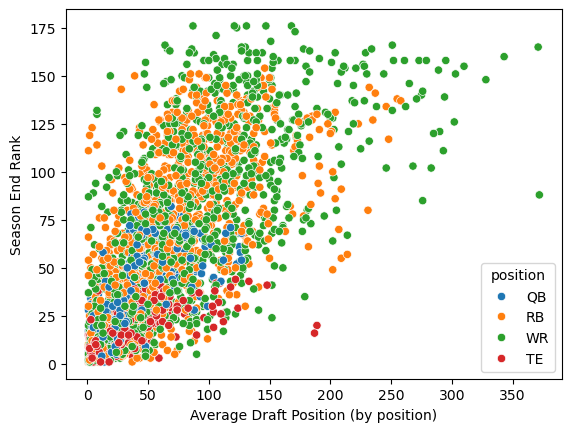

In [166]:
sns.scatterplot(data=adp_season_df, x='position_rank', y='position_season_end_rank', hue='position')
plt.xlabel('Average Draft Position (by position)')
plt.ylabel('Season End Rank')
plt.show()

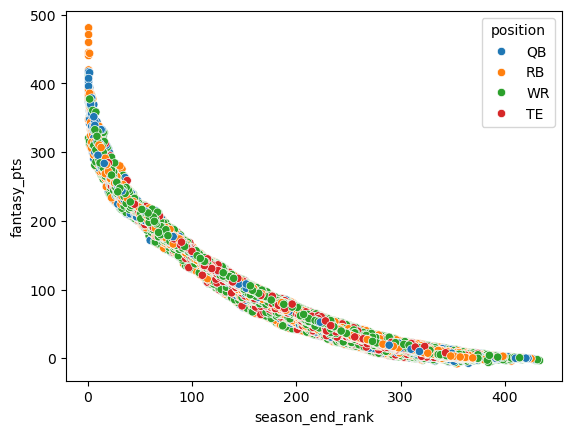

In [167]:
sns.scatterplot(data=adp_season_df, x='season_end_rank', y='fantasy_pts', hue='position')
plt.show()

What’s the average point drop-off between draft rounds?

In [168]:
# Say 12 teams (Could narrow this down)
num_teams = 12
total_slots_per_team = 14

"""
QB
RB
RB
WR
WR
TE
FLEX

BENCH x7

14 total slots per fantasy team
"""
adp_season_df['ESPN_reranked'] = adp_season_df.sort_values(['ESPN', 'fantasy_pts'], ascending=[True, False]).groupby('season').cumcount() + 1
adp_season_df['estimated_draft_round'] = ((adp_season_df['ESPN_reranked'].dropna() - 1) / (num_teams)).astype(int) + 1
adp_season_df['estimated_draft_round'] = np.where(adp_season_df['estimated_draft_round'] > total_slots_per_team, np.nan, adp_season_df['estimated_draft_round'].astype(int))
df_2024 = adp_season_df.loc[adp_season_df['season'] == 2024].copy()
df_2024.head()

,id,team,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,AVG,position_rank,bye_week,position_season_end_rank,season_end_rank,position_season_end_rank_diff,season_end_rank_diff,team_total_season_fantasy_pts,ESPN_reranked,estimated_draft_round
3864,00-0023459,NYJ,QB,2024,0,3623.0,24.0,0.0,10.0,2.0,...,136.2,18.0,NaN,16,40,-2.0,-96.2,1301.68,90,8.0
4844,00-0026158,IND,QB,2024,0,1497.0,11.0,0.0,7.0,4.0,...,317.5,39.0,10.0,36,179,-3.0,-138.5,981.60,178,NaN
5227,00-0026498,LA,QB,2024,0,3762.0,20.0,0.0,8.0,2.0,...,150.6,20.0,6.0,18,54,-2.0,-96.6,1164.48,129,11.0
5360,00-0026300,BAL,QB,2024,0,17.0,0.0,0.0,0.0,0.0,...,446.5,66.0,14.0,65,366,-1.0,-80.5,1508.88,197,NaN
6077,00-0027973,CAR,QB,2024,0,989.0,7.0,0.0,6.0,0.0,...,410.0,60.0,11.0,41,214,-19.0,-196.0,986.44,204,NaN


In [169]:
adp_season_df.groupby('estimated_draft_round')['fantasy_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
estimated_draft_round,,,,,,,,
1.0,312.0,302.122115,68.562230,13.00,282.075,309.89,339.665,481.10
2.0,312.0,257.167051,51.608178,14.10,251.695,269.60,281.000,373.76
3.0,312.0,234.213269,44.475230,9.60,226.175,242.50,255.125,407.40
4.0,312.0,218.358013,43.440111,49.70,210.575,222.69,233.025,412.90
5.0,312.0,195.326987,45.896751,26.10,192.425,203.23,211.300,369.58
6.0,312.0,184.322885,43.514622,2.00,177.900,187.80,195.050,383.26
7.0,312.0,170.053333,43.648825,-0.20,160.315,172.20,179.705,396.06
8.0,312.0,153.280577,43.808628,5.80,147.395,157.85,165.150,415.68
9.0,312.0,143.223782,41.131957,3.20,133.125,146.05,153.150,305.36


Text(0.5, 1.0, 'Fantasy Points Distribution by Estimated Draft Round')

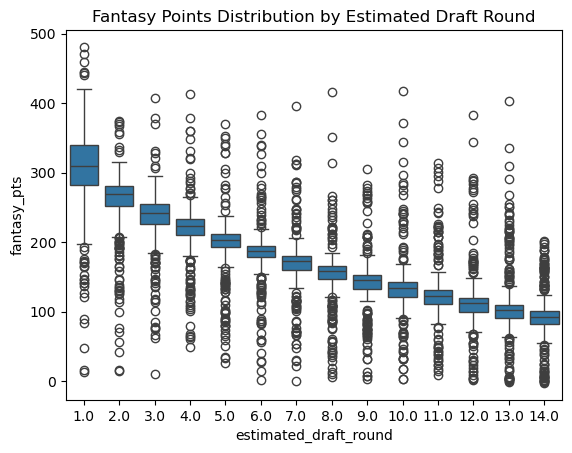

In [170]:
sns.boxplot(data=adp_season_df, x='estimated_draft_round', y='fantasy_pts')
plt.title('Fantasy Points Distribution by Estimated Draft Round')

In [171]:
avg_drop_off = adp_season_df.groupby('estimated_draft_round')['fantasy_pts'].mean().reset_index()
avg_drop_off['previous_round_avg_fantasy_pts'] = avg_drop_off['fantasy_pts'].shift(1)
avg_drop_off['avg_drop_off'] = avg_drop_off['fantasy_pts'] - avg_drop_off['previous_round_avg_fantasy_pts']
avg_drop_off[['estimated_draft_round', 'avg_drop_off']]

,estimated_draft_round,avg_drop_off
0,1.0,NaN
1,2.0,-44.955064
2,3.0,-22.953782
3,4.0,-15.855256
4,5.0,-23.031026
5,6.0,-11.004103
6,7.0,-14.269551
7,8.0,-16.772756
8,9.0,-10.056795
9,10.0,-7.267179


Which positions/players are historically most over- or under-projected?

In [172]:
# Let's look at ADP vs season end rankings
adp_season_df['ADP_diff'] = adp_season_df['AVG'] - adp_season_df['season_end_rank']
adp_season_df.groupby('position')['ADP_diff'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,529.0,95.984499,114.656642,-229.5,31.00,85.0,148.70,613.0
TE,311.0,59.270096,122.261192,-222.7,-18.70,35.6,113.00,789.0
WR,1119.0,56.050849,130.352835,-312.5,-21.65,30.0,119.35,722.0
RB,1021.0,18.719687,129.946508,-338.0,-58.50,1.4,72.80,597.0


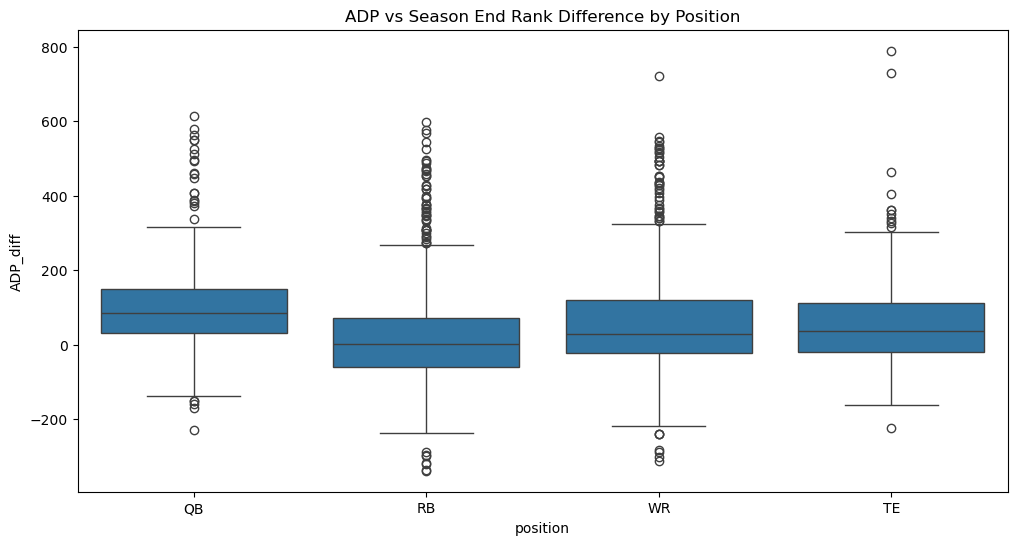

In [173]:
# Let's visualize the difference between ADP and season end rank
plt.figure(figsize=(12, 6))
sns.boxplot(data=adp_season_df, x='position', y='ADP_diff')
plt.title('ADP vs Season End Rank Difference by Position')
plt.show()

It seems that Quarterbacks tend to be most over-valued, while Running Backs are least over-valued.

In [174]:
# Let's come back with projeted vs actual fantasy points

What % of drafted players miss significant time?

In [175]:
injuries = pd.read_csv('../data/raw/injuries.csv', index_col=0)
# Only look at injuries that occurred before week 18
seasonal_injuries = injuries.loc[injuries['week']<18].copy()
seasonal_injuries = seasonal_injuries.groupby(['gsis_id', 'season']).agg({'week': 'count'}).reset_index()
seasonal_injuries = seasonal_injuries.rename(columns={'week': 'injury_count_num_weeks'})
seasonal_injuries = seasonal_injuries[['gsis_id', 'season', 'injury_count_num_weeks']]
seasonal_injuries.head()

,gsis_id,season,injury_count_num_weeks
0,00-0000045,2009,2
1,00-0000045,2010,4
2,00-0000108,2010,1
3,00-0000108,2012,5
4,00-0000551,2009,1


In [176]:
adp_season_df = pd.merge(adp_season_df, seasonal_injuries, how='left', left_on=['gsis_id', 'season'], right_on=['gsis_id', 'season'])
adp_season_df.head()

,id,team,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,bye_week,position_season_end_rank,season_end_rank,position_season_end_rank_diff,season_end_rank_diff,team_total_season_fantasy_pts,ESPN_reranked,estimated_draft_round,ADP_diff,injury_count_num_weeks
0,00-0012726,PHI,QB,1999,0,1276.0,7.0,0.0,9.0,6.0,...,NaN,44,198,NaN,NaN,681.60,209,NaN,NaN,NaN
1,00-0012726,CLE,QB,2000,0,1047.0,2.0,0.0,8.0,0.0,...,NaN,41,204,NaN,NaN,722.66,212,NaN,NaN,NaN
2,00-0012726,GB,QB,2001,0,0.0,0.0,0.0,0.0,0.0,...,NaN,70,341,NaN,NaN,1335.14,381,NaN,NaN,NaN
3,00-0012726,GB,QB,2002,0,134.0,1.0,0.0,0.0,0.0,...,NaN,54,274,NaN,NaN,1245.02,291,NaN,NaN,NaN
4,00-0012726,GB,QB,2003,0,16.0,0.0,0.0,0.0,0.0,...,NaN,75,340,NaN,NaN,1283.68,375,NaN,NaN,NaN


In [177]:
# Let's define 'significant injury' as 4 or more weeks
significant_injury_time = 4
adp_season_df['significant_injury'] = np.where(adp_season_df['injury_count_num_weeks'] >= significant_injury_time, 1, 0)
drafted_players = adp_season_df.loc[adp_season_df['ESPN_reranked'].notna()]
drafted_players.groupby(['estimated_draft_round', 'significant_injury'])['fantasy_pts'].mean().reset_index()

,estimated_draft_round,significant_injury,fantasy_pts
0,1.0,0,318.163725
1,1.0,1,271.821296
2,2.0,0,263.752315
3,2.0,1,242.350208
4,3.0,0,236.636432
5,3.0,1,228.999798
6,4.0,0,221.723883
7,4.0,1,211.816792
8,5.0,0,198.550286
9,5.0,1,188.690784


It looks like players in later rounds actually end up with more fantasy points on average if they have a significant injury, most likely because an injury is an indication of some significant level of playing time. However, players in rounds 1-8 do lose fantasy value due to injuries.

In [178]:
# What percentage of players drafted in each round had a significant injury?
injury_percentage = drafted_players.groupby(['significant_injury'])['fantasy_pts'].count().reset_index()
injury_percentage = injury_percentage.rename(columns={'fantasy_pts': 'count'})
#injury_percentage = injury_percentage.pivot(index='estimated_draft_round', columns='significant_injury', values='count').reset_index()
injury_percentage = injury_percentage[injury_percentage['significant_injury'] == 1]['count']/injury_percentage['count'].sum()
print(f"Percentage of players drafted with significant injury: {injury_percentage.iloc[0]:.2%}")

Percentage of players drafted with significant injury: 20.80%


How much does injury risk affect fantasy point variability?

In [179]:
# How to quantify injury risk?

# Let's look at the distribution of injuries by position
injury_distribution = (
    adp_season_df.groupby('position')
    .agg(
        total_injury_weeks=('injury_count_num_weeks', 'sum'),
        num_players=('gsis_id', 'nunique')
    )
    .reset_index()
)

injury_distribution['injury_weeks_per_player'] = (
    injury_distribution['total_injury_weeks'] / injury_distribution['num_players']
)

injury_distribution


,position,total_injury_weeks,num_players,injury_weeks_per_player
0,QB,2589.0,400,6.472500
1,RB,6371.0,980,6.501020
2,TE,2205.0,147,15.000000
3,WR,9158.0,898,10.198218


In [180]:
player_injury_stats = adp_season_df.dropna(subset=['estimated_draft_round']).groupby(['position']).agg(
    injury_weeks=('injury_count_num_weeks', 'sum'),
    avg_points=('fantasy_pts', 'mean'),
    std_points=('fantasy_pts', 'std')
).reset_index()

player_injury_stats['point_variability'] = player_injury_stats['std_points'] / player_injury_stats['avg_points']
player_injury_stats.sort_values('point_variability', ascending=False)

,position,injury_weeks,avg_points,std_points,point_variability
1,RB,3220.0,169.229607,79.572379,0.470204
3,WR,4956.0,170.402056,68.957204,0.404674
2,TE,1112.0,146.446459,58.256108,0.397798
0,QB,1756.0,203.120645,80.206245,0.394870


Are injury-prone players still top scorers when healthy?

In [181]:
# We will define injury prone as a player who has sustained a significant injury at least twice in the last 3 seasons
injury_per_season = (
    adp_season_df[adp_season_df['significant_injury']==1]
    .groupby(['gsis_id', 'season'])
    .size()
    .reset_index(name='significant_injury_count')
)

all_seasons = adp_season_df['season'].unique()
players = adp_season_df['gsis_id'].unique()

player_season_index = pd.MultiIndex.from_product([players, all_seasons], names=['gsis_id', 'season'])
injury_rollup = pd.DataFrame(index=player_season_index).reset_index()

injury_rollup = injury_rollup.merge(injury_per_season, on=['gsis_id', 'season'], how='left')
injury_rollup['significant_injury_count'] = injury_rollup['significant_injury_count'].fillna(0)

injury_rollup = injury_rollup.sort_values(['gsis_id', 'season'])

injury_rollup['rolling_injury_count'] = (
    injury_rollup
    .groupby('gsis_id')['significant_injury_count']
    .rolling(window=3, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)

injury_rollup['injury_prone'] = injury_rollup['rolling_injury_count'] >= 2

adp_season_df = adp_season_df.merge(
    injury_rollup[['gsis_id', 'season', 'injury_prone']],
    on=['gsis_id', 'season'],
    how='left'
)

injury_rollup.head()

,gsis_id,season,significant_injury_count,rolling_injury_count,injury_prone
1612,00-0000003,1999,0.0,0.0,False
1613,00-0000003,2000,0.0,0.0,False
1614,00-0000003,2001,0.0,0.0,False
1615,00-0000003,2002,0.0,0.0,False
1616,00-0000003,2003,0.0,0.0,False


In [188]:
adp_season_df.head()

,id,team,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,season_end_rank,position_season_end_rank_diff,season_end_rank_diff,team_total_season_fantasy_pts,ESPN_reranked,estimated_draft_round,ADP_diff,injury_count_num_weeks,significant_injury,injury_prone
0,00-0012726,PHI,QB,1999,0,1276.0,7.0,0.0,9.0,6.0,...,198,NaN,NaN,681.60,209,NaN,NaN,NaN,0,False
1,00-0012726,CLE,QB,2000,0,1047.0,2.0,0.0,8.0,0.0,...,204,NaN,NaN,722.66,212,NaN,NaN,NaN,0,False
2,00-0012726,GB,QB,2001,0,0.0,0.0,0.0,0.0,0.0,...,341,NaN,NaN,1335.14,381,NaN,NaN,NaN,0,False
3,00-0012726,GB,QB,2002,0,134.0,1.0,0.0,0.0,0.0,...,274,NaN,NaN,1245.02,291,NaN,NaN,NaN,0,False
4,00-0012726,GB,QB,2003,0,16.0,0.0,0.0,0.0,0.0,...,340,NaN,NaN,1283.68,375,NaN,NaN,NaN,0,False


In [192]:
adp_season_df.dropna(subset=['estimated_draft_round']).groupby(['position', 'injury_prone'])['fantasy_pts'].describe()

count        mean        std    min      25%     50%  \
position injury_prone                                                          
QB       False          719.0  197.872823  78.597847  -1.30  137.810  199.08   
         True           118.0  235.096780  82.795068  56.96  168.670  247.01   
RB       False         1094.0  167.575466  79.830875  -0.20  111.825  153.82   
         True           255.0  176.326196  78.211473   2.00  121.100  173.90   
TE       False          259.0  146.911042  58.633751   8.00  110.450  139.90   
         True            94.0  145.166383  57.493903  32.50  109.475  138.60   
WR       False         1411.0  168.312275  67.009275   0.00  116.350  158.30   
         True           418.0  177.456316  74.815684  -2.40  120.700  172.90   

                           75%     max  
position injury_prone                   
QB       False         254.510  417.08  
         True          294.160  397.14  
RB       False         213.885  481.10  
         True          221.710  471.20  
TE       False         180.200  330.90  
         True          183.100  303.50  
WR       False         213.150  412.90  
         True          225.250  377.40

In [205]:
injury_prone_players = adp_season_df.loc[adp_season_df['injury_prone'] == True, 'gsis_id'].unique()
injury_prone = adp_season_df[adp_season_df['gsis_id'].isin(injury_prone_players)].copy()
injury_prone.groupby(['gsis_id', 'significant_injury'])['fantasy_pts'].describe()

count        mean        std     min      25%  \
gsis_id    significant_injury                                                  
00-0003292 0                    11.0  136.072727  75.332698   15.96   84.410   
           1                     2.0   64.080000  63.554757   19.14   41.610   
00-0004161 0                     9.0  117.386667  90.081394    4.32   40.040   
           1                     2.0   52.640000  36.712984   26.68   39.660   
00-0004541 0                    12.0  165.233333  88.448478   12.10  103.525   
...                              ...         ...        ...     ...      ...   
00-0038551 1                     2.0   28.750000   0.494975   28.40   28.575   
00-0038977 1                     2.0  152.500000  17.677670  140.00  146.250   
00-0038979 1                     2.0   58.650000  30.759145   36.90   47.775   
00-0039146 1                     2.0  196.950000   7.141778  191.90  194.425   
00-0039152 1                     2.0  105.080000   4.327494  102.02  103.550   

                                  50%      75%     max  
gsis_id    significant_injury                           
00-0003292 0                   146.14  199.410  214.90  
           1                    64.08   86.550  109.02  
00-0004161 0                   151.40  175.460  248.54  
           1                    52.64   65.620   78.60  
00-0004541 0                   202.40  236.400  266.70  
...                               ...      ...     ...  
00-0038551 1                    28.75   28.925   29.10  
00-0038977 1                   152.50  158.750  165.00  
00-0038979 1                    58.65   69.525   80.40  
00-0039146 1                   196.95  199.475  202.00  
00-0039152 1                   105.08  106.610  108.14  

[953 rows x 8 columns]

How does team offensive rank affect player fantasy outcomes?

In [198]:
adp_season_df['team_rank'] = adp_season_df.groupby(['season'])['team_total_season_fantasy_pts'].rank(ascending=False, method='dense')
adp_season_df.head()

,id,team,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,position_season_end_rank_diff,season_end_rank_diff,team_total_season_fantasy_pts,ESPN_reranked,estimated_draft_round,ADP_diff,injury_count_num_weeks,significant_injury,injury_prone,team_rank
0,00-0012726,PHI,QB,1999,0,1276.0,7.0,0.0,9.0,6.0,...,NaN,NaN,681.60,209,NaN,NaN,NaN,0,False,30.0
1,00-0012726,CLE,QB,2000,0,1047.0,2.0,0.0,8.0,0.0,...,NaN,NaN,722.66,212,NaN,NaN,NaN,0,False,30.0
2,00-0012726,GB,QB,2001,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1335.14,381,NaN,NaN,NaN,0,False,2.0
3,00-0012726,GB,QB,2002,0,134.0,1.0,0.0,0.0,0.0,...,NaN,NaN,1245.02,291,NaN,NaN,NaN,0,False,9.0
4,00-0012726,GB,QB,2003,0,16.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1283.68,375,NaN,NaN,NaN,0,False,7.0


In [200]:
adp_season_df[['fantasy_pts', 'team_rank']].corr()

,fantasy_pts,team_rank
fantasy_pts,1.000000,-0.147163
team_rank,-0.147163,1.000000


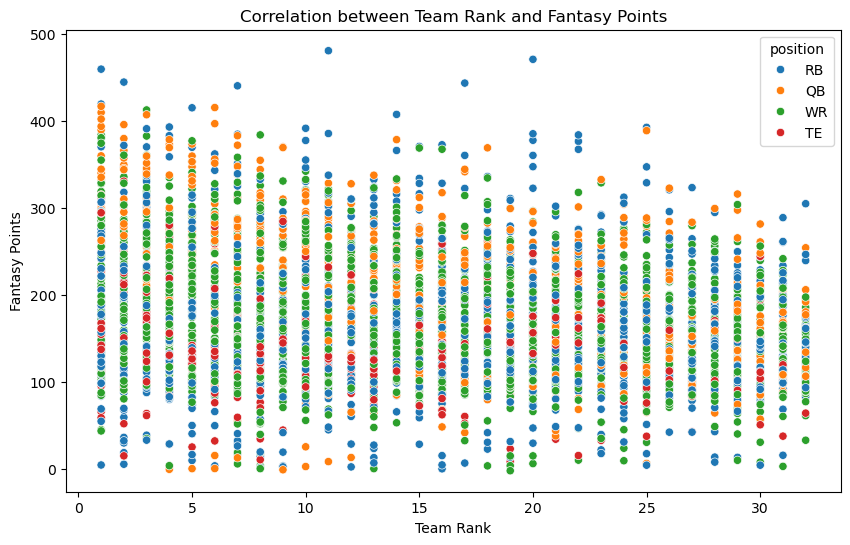

In [210]:
# Plot the correlation between fantasy points and team rank
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adp_season_df.dropna(subset=['estimated_draft_round']), y='fantasy_pts', x='team_rank', hue='position')
plt.title('Correlation between Team Rank and Fantasy Points')
plt.ylabel('Fantasy Points')
plt.xlabel('Team Rank')
plt.show()

Do players perform better/worse when switching teams?

In [218]:
# Identify players that switch teams
adp_season_df['team_change'] = adp_season_df.groupby(['gsis_id'])['team'].shift(1) != adp_season_df['team']
adp_season_df['team_change'] = np.where(adp_season_df['team_change'] == True, 1, 0)
adp_season_df.groupby(['position', 'team_change'])['ff_pts_diff'].describe()

count       mean        std     min     25%  50%  \
position team_change                                                      
QB       0            1091.0  -1.440752  85.291972 -387.00 -46.670 -1.7   
         1             521.0 -10.244645  75.383434 -302.96 -47.060 -2.6   
RB       0            1917.0  -4.364382  76.838192 -394.80 -42.700 -1.8   
         1             808.0 -13.407970  64.721787 -274.00 -51.175 -3.0   
TE       0             607.0  -1.040791  54.517336 -182.00 -28.550 -0.7   
         1             174.0   0.571954  48.949567 -163.10 -31.100  0.0   
WR       0            2385.0  -2.274801  70.015907 -290.70 -43.200 -1.8   
         1            1048.0 -12.664179  62.081199 -307.60 -48.900 -5.6   

                         75%     max  
position team_change                  
QB       0            38.000  406.72  
         1            22.380  294.40  
RB       0            32.160  332.80  
         1             8.675  306.40  
TE       0            26.800  205.40  
         1            23.775  152.80  
WR       0            39.400  325.80  
         1            13.280  268.90

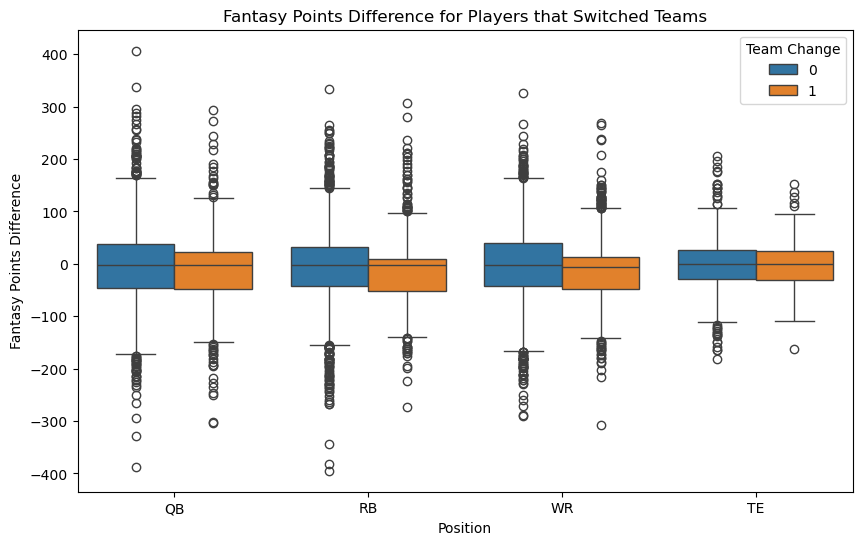

In [223]:
# Visualize the difference in fantasy points for players that switched teams
plt.figure(figsize=(10, 6))
sns.boxplot(data=adp_season_df, x='position', y='ff_pts_diff', hue='team_change')
plt.title('Fantasy Points Difference for Players that Switched Teams')
plt.xlabel('Position')
plt.ylabel('Fantasy Points Difference')
plt.legend(title='Team Change', loc='upper right')
plt.show()

It seems that most players do worse when changing teams, with the exception of Tight Ends

In [225]:
# What happens when a player switches to a better ranked team?
switched_teams = adp_season_df.loc[adp_season_df['team_change'] == 1].copy()
switched_teams['team_rank_prev'] = switched_teams.groupby(['gsis_id'])['team_rank'].shift(1)
switched_teams['new_team_rank_better'] = np.where(switched_teams['team_rank_prev'] > switched_teams['team_rank'], 1, 0)
switched_teams.groupby(['position', 'new_team_rank_better'])['ff_pts_diff'].describe()

count       mean        std     min     25%  \
position new_team_rank_better                                                
QB       0                     267.0  -6.474757  76.339176 -301.34 -44.400   
         1                     254.0 -14.207480  74.309487 -302.96 -49.060   
RB       0                     415.0 -15.065590  62.586314 -274.00 -50.650   
         1                     393.0 -11.657557  66.938296 -198.08 -51.900   
TE       0                      82.0   2.972195  52.342738 -109.40 -31.100   
         1                      92.0  -1.567391  45.898141 -163.10 -30.725   
WR       0                     551.0 -14.122105  59.263225 -190.10 -48.500   
         1                     497.0 -11.047847  65.084868 -307.60 -48.800   

                                50%     75%     max  
position new_team_rank_better                        
QB       0                     0.00  30.800  294.40  
         1                    -6.74   8.940  271.90  
RB       0                    -2.80   7.200  279.62  
         1                    -3.70   9.500  306.40  
TE       0                     0.00  26.075  152.80  
         1                     0.05  19.075   94.60  
WR       0                    -4.70  14.050  238.80  
         1                    -6.50  13.000  268.90

When players do switch teams, WRs and RBs do better on a better ranked team. QBs and TEs do worse on a better team, on average.

How often do sleepers (late-round picks) end up as top-20 players?

Which draft positions yield the best total fantasy performance?

Are there trends or biases in who gets drafted too early or too late?

How close were preseason projections to actual outcomes? What level of variance exists in player outcomes vs. projections?

### Expanding Josh Allen's stats

In [182]:
ja = all_players[all_players['id']==josh_allen_id]
ja

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff
10453,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,1996-05-21,77.0,240.0,Wyoming,00-0034857,0.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,NaN,NaN
10454,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,1.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,206.86,81.70
10455,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,2.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,288.56,107.50
10456,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,3.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,396.06,-17.34
10457,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,4.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,378.72,-4.96
10458,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,5.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,373.76,-4.18
10459,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,6.0,https://static.www.nfl.com/image/upload/f_auto...,2018.0,369.58,2.76


In [183]:
ja_df = pd.merge(ja, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year_y,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,17.0,REG,A01,Josh,7.0
1,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,18.0,WC,A01,Josh,7.0
2,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,CON,A01,Josh,7.0
3,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
4,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
5,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
6,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,21.0,CON,A01,Josh,7.0


In [184]:
next_gen_pass = pd.read_csv('../data/raw/next_gen_passing.csv', index_col=0).reset_index(drop=True)
next_gen_pass.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Drew Brees,QB,NO,2.424238,6.195456,7.550997,-1.355541,...,69.985141,64.783965,5.201176,20.815996,59.033016,00-0020531,Drew,Brees,9,D.Brees
1,2016,REG,0,Joe Flacco,QB,BAL,2.566823,5.187294,7.720937,-2.533644,...,64.880952,64.367218,0.513734,20.995448,62.710625,00-0026158,Joe,Flacco,5,J.Flacco
2,2016,REG,0,Russell Wilson,QB,SEA,2.606104,7.167756,9.240646,-2.072890,...,64.652015,59.305514,5.346501,23.137055,61.277761,00-0029263,Russell,Wilson,3,R.Wilson
3,2016,REG,0,Josh McCown,QB,CLE,2.800770,7.360889,10.353818,-2.992929,...,54.545455,59.587162,-5.041707,23.423919,55.424624,00-0021206,Josh,McCown,13,NaN
4,2016,REG,0,Eli Manning,QB,NYG,2.527473,5.437374,8.191990,-2.754616,...,63.043478,63.397823,-0.354345,20.702627,57.601267,00-0022803,Eli,Manning,10,E.Manning


In [185]:
ja_ng = next_gen_pass[next_gen_pass['player_gsis_id']==josh_allen_id]
ja_ng.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
1173,2018,REG,0,Josh Allen,QB,BUF,3.217784,6.478698,11.029344,-4.550646,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1201,2018,REG,1,Josh Allen,QB,BUF,3.724800,11.066667,15.266667,-4.200000,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
1241,2018,REG,2,Josh Allen,QB,BUF,3.504394,7.142222,10.744545,-3.602323,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
1266,2018,REG,3,Josh Allen,QB,BUF,2.699636,3.708667,8.293182,-4.584515,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
1308,2018,REG,4,Josh Allen,QB,BUF,3.013848,4.710625,9.206061,-4.495436,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen


In [186]:
ja_ng_filtered = ja_ng[ja_ng['week']<18]
ja_ng_grouped = ja_ng_filtered.groupby('season').agg({'player_position':'first',
                                                      'team_abbr':'first',
                                                      'avg_time_to_throw':'mean',
                                                      'avg_completed_air_yards':'mean',
                                                      'avg_intended_air_yards':'mean',
                                                      'avg_air_yards_differential':'mean',
                                                      'aggressiveness':'mean',
                                                        # More to add...
                                                      })
ja_ng_grouped

,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness
season,,,,,,,
2018,QB,BUF,3.217519,6.671415,11.151912,-4.480497,14.229480
2019,QB,BUF,2.851657,6.486776,9.481988,-2.995211,15.239672
2020,QB,BUF,3.045675,6.904674,8.833025,-1.928351,13.308553
2021,QB,BUF,2.919952,6.954294,8.837729,-1.883435,11.936116
2022,QB,BUF,2.856187,7.453386,9.359086,-1.905700,12.621350
2023,QB,BUF,2.890902,5.936266,8.551637,-2.615371,14.445016
2024,QB,BUF,2.892080,5.383275,8.326768,-2.943493,17.051663


In [187]:
ja_df = pd.merge(ja_df, next_gen_pass, how='left', left_on=['id', 'season'], right_on=['player_gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
2,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
3,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
4,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,55.172414,56.745687,-1.573274,24.757465,60.458993,00-0034857,Joshua,Allen,17,J.Allen
125,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,59.259259,57.271931,1.987328,20.651440,45.627335,00-0034857,Joshua,Allen,17,J.Allen
126,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,76.923077,64.237265,12.685812,21.267522,47.495419,00-0034857,Joshua,Allen,17,J.Allen
127,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,72.727273,74.503033,-1.775760,18.502121,39.714664,00-0034857,Joshua,Allen,17,J.Allen
